In [2]:
!pip install gensim -i https://pypi.douban.com/simple/

Looking in indexes: https://pypi.douban.com/simple/
    100% |████████████████████████████████| 24.7MB 1.2MB/s eta 0:00:01
    100% |████████████████████████████████| 71kB 855kB/s ta 0:00:01
    100% |████████████████████████████████| 133kB 2.9MB/s ta 0:00:01
    100% |████████████████████████████████| 5.6MB 180kB/s ta 0:00:011
    100% |████████████████████████████████| 71kB 1.2MB/s ta 0:00:011
    100% |████████████████████████████████| 153kB 27.9MB/s ta 0:00:01
  Running setup.py bdist_wheel for smart-open ... done
  Stored in directory: /Users/junl/Library/Caches/pip/wheels/d6/99/34/8ef455ebe1eac3de61bcf4793a3c1ef68431ca3ebeec804488
Successfully built smart-open
intervaltree 3.0.2 has requirement sortedcontainers<3.0,>=2.0, but you'll have sortedcontainers 1.5.7 which is incompatible.
You are using pip version 10.0.1, however version 19.2.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [5]:
import pandas as pd
import jieba

In [6]:
corpus = []
with open('../../data/wiki_00simple', 'r') as f:
    lines = f.readlines()
    for i, line in enumerate(lines):
        if i % 10000 == 0:
            print(i)
        if i % 3000000 == 0 and i != 0:
            break
        words = list(jieba.cut(line))
        corpus.append(words)
print(corpus[:2])

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/r9/_lb9pgcn0x92f1_q63l7vbxm0000gn/T/jieba.cache


0


Loading model cost 0.731 seconds.
Prefix dict has been built succesfully.


10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000
880000
890000
900000
910000
920000
930000
940000
950000
960000
970000
980000
990000
1000000
1010000
1020000
1030000
1040000
1050000
1060000
1070000
1080000
1090000
1100000
1110000
1120000
1130000
1140000
1150000
1160000
1170000
1180000
1190000
1200000
1210000
1220000
1230000
1240000
1250000
1260000
1270000
1280000
1290000
1300000
1310000
1320000
1330000
1340000
1350000
1360000
1370000
1380000
1390

In [7]:
from gensim.models import word2vec

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
model = word2vec.Word2Vec(corpus, size=100, window=20, min_count=200, workers=8)

In [9]:
model.wv['数学']

array([ 1.37693393, -0.257844  ,  3.66464829,  1.78124607, -3.8558023 ,
        1.4606781 , -3.260813  ,  6.88631248, -1.3039515 ,  4.28350449,
       -2.05447125, -1.4501152 , -3.39081764,  3.66249251, -1.22468102,
        0.51656908,  2.10768843, -2.38547325, -6.07344389, -0.68478477,
       -1.88041627, -2.63235784, -1.00249958,  1.36308432, -1.31292021,
        1.2799536 ,  1.5773716 , -1.64592612, -1.74310148, -0.98613238,
        1.08550632, -0.20778878, -3.79379296,  3.36322212,  1.17011094,
       -1.16940308,  0.32981235, -0.87552565, -1.9883883 ,  6.04487276,
        1.69523036,  0.53315306,  0.79742074, -3.58513594, -4.64246273,
       -1.79072177, -0.87829065, -3.79756165,  5.02479219,  1.92674589,
       -0.35385805,  0.47024915, -0.67375779, -0.46080542,  1.34840488,
       -0.92907494, -1.06829858, -4.99376917,  1.99182856, -1.11246407,
        0.15425047, -1.69035304, -3.52310967, -0.56813538,  0.71661353,
        1.32801759,  2.92605805, -2.34741664, -2.40848756,  0.11

In [10]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

In [13]:
import matplotlib
matplotlib.rcParams['font.family'] = 'Arial Unicode MS'
matplotlib.rcParams['font.serif'] = 'Arial Unicode MS'
matplotlib.rcParams['font.sans-serif'] = 'Arial Unicode MS'
matplotlib.rcParams['axes.unicode_minus'] = False

/Users/junl/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


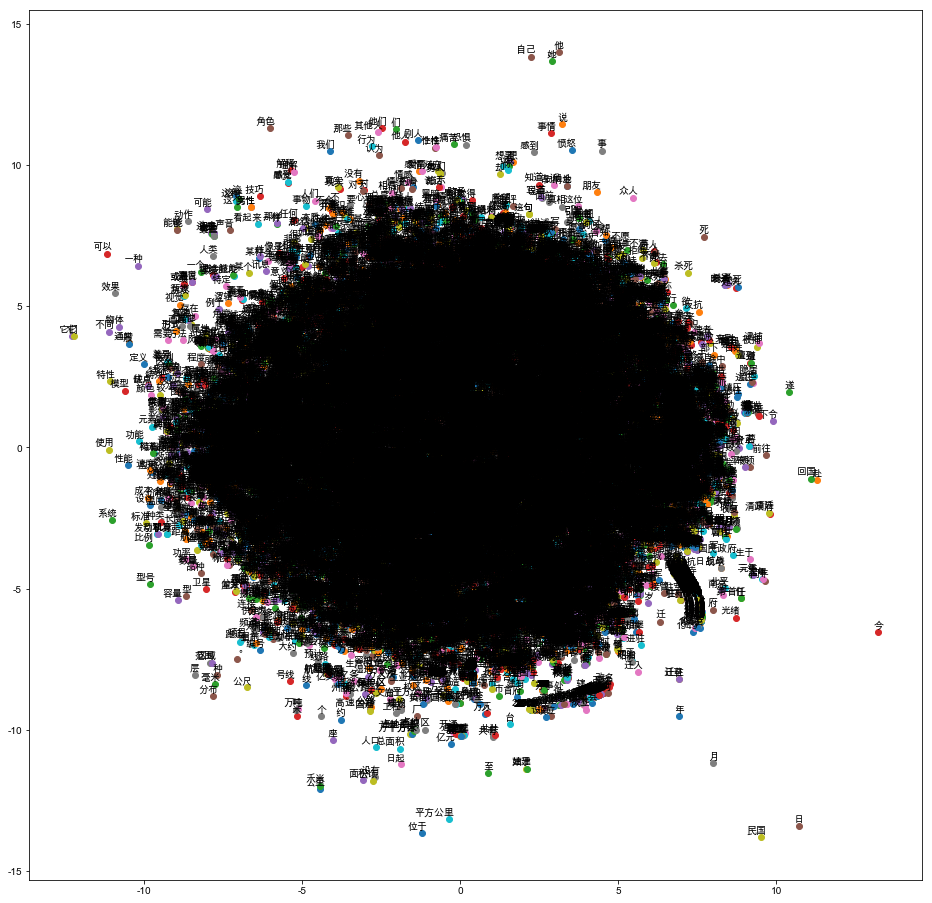

In [14]:
tsne_plot(model)

In [19]:
model.wv.most_similar('例子')

[('范例', 0.6558344960212708),
 ('实例', 0.5650857090950012),
 ('典型', 0.5510562062263489),
 ('特例', 0.5492918491363525),
 ('值得注意', 0.5466474294662476),
 ('一阶', 0.5323164463043213),
 ('下面', 0.5259218215942383),
 ('案例', 0.5230304002761841),
 ('语句', 0.5202000141143799),
 ('表示法', 0.5139932036399841)]

In [18]:
model.wvmost_similar('数学')

/Users/junl/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('微积分', 0.7798559665679932),
 ('数论', 0.7796586751937866),
 ('几何学', 0.7796225547790527),
 ('算术', 0.7632691860198975),
 ('自然科学', 0.743743360042572),
 ('数学家', 0.7096705436706543),
 ('几何', 0.7095500826835632),
 ('物理', 0.7019379734992981),
 ('拓扑学', 0.6975198984146118),
 ('物理学', 0.6706644296646118)]